In [141]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import numpy as np

In [154]:
# plot 3 host filtration methods (6 tsv files)
def plot_host_filtration_data(file_paths):
    # read and merge all tsvs
    df_list = []
    for file_path in file_paths:
        df = pd.read_csv(file_path, sep='\t')
        method_identifier = file_path.split('/host_depleted/')[1].split('/')[0]
        df['prefix'] = df['file'].apply(lambda x: x.split('/')[-1].split('.')[0])
        df['method group'] = 'Method ' + method_identifier.split('_')[-1].lstrip('m')
        df_list.append(df)
    merged_df = pd.concat(df_list, ignore_index=True)
    if 'human count' in merged_df.columns:
        merged_df['log_human_count'] = merged_df['human count'] #np.log(merged_df['human count'] + 1)
    else:
        merged_df['log_human_count'] = np.log(merged_df['line count']/4 + 1)

    # define colors for each method group
    group_colors = {
        'Method 1': 'skyblue',
        'Method 2': 'lightgreen',
        'Method 3': 'salmon',
    }

    # start creating subplots
    width_ratios = [3, 2, 1]
    fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': width_ratios})

    # plot for each method group
    for i, (method_group, ax) in enumerate(zip(merged_df['method group'].unique(), axes.flatten())):
        group_data = merged_df[merged_df['method group'] == method_group]
        sns.boxplot(x='key', y='log_human_count', data=group_data, ax=ax, color=group_colors[method_group])
        sns.stripplot(x='key', y='log_human_count', data=group_data, color='black', size=4, jitter=True, ax=ax)
        ax.set_title(f'{method_group}')
        ax.set_ylabel('Remaining Human Read Count (log)' if i == 0 else '')
        ax.set_xticklabels(group_data['key'].unique(), rotation=45)

    plt.tight_layout()
    plt.show()
    
    return df_list

# extract read IDs from fastq
def extract_read_ids_from_fastq(fastq_file):
    """
    Extracts read IDs from a FASTQ file and returns them as a set.

    Args:
    fastq_file (str): Path to the FASTQ file.

    Returns:
    set: A set of read IDs.
    """
    read_ids = set()
    with open(fastq_file, 'r') as file:
        for i, line in enumerate(file):
            if i % 4 == 0:
                read_id = line.strip().split()[0]
                if read_id.startswith('@'):
                    read_id = read_id.split('/')[0][1:]
                    read_ids.add(read_id)
    return read_ids
    
# plot venn diagram analysis
def plot_venn(a_fq, b_fq, title):
    a_ids = extract_read_ids_from_fastq(a_fq)
    b_ids = extract_read_ids_from_fastq(b_fq)
    fig, ax = plt.subplots(figsize=(6,8))

    venn2([a_ids, b_ids], ('ALIGN-HPRC', 'INDEX-HPRC'), ax=ax)
    ax1.set_title(title) 

## Figure 1A

In [99]:
# TODO: replace with Caitlin's figure

## Figure 1B

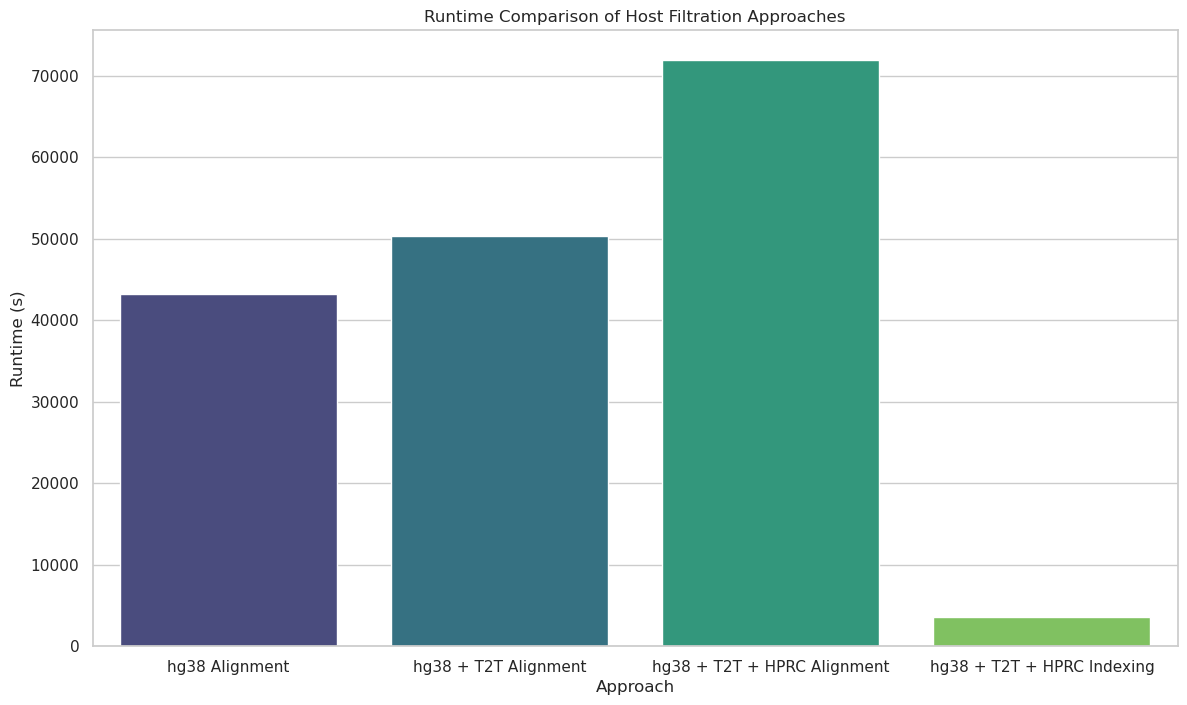

In [100]:
# TODO: replace with Caitlin's approach

file_paths = ["../data/time_hg38_alignment.txt", "../data/time_hg38_t2t_alignment.txt", "../data/time_hg38_t2t_hprc_alignment.txt", "../data/time_hg38_t2t_hprc_indexing.txt"]
labels = ["hg38 Alignment", "hg38 + T2T Alignment", "hg38 + T2T + HPRC Alignment", "hg38 + T2T + HPRC Indexing"]
runtimes = []

# read the last line from each file for runtime
for file_path in file_paths:
    with open(file_path, 'r') as file:
        last_line = file.readlines()[-1]
        runtimes.append(float(last_line.strip()))

# plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x=labels, y=runtimes, palette="viridis")

plt.title('Runtime Comparison of Host Filtration Approaches')
plt.xlabel('Approach')
plt.ylabel('Runtime (s)')
plt.show()

## Figure 1C-1

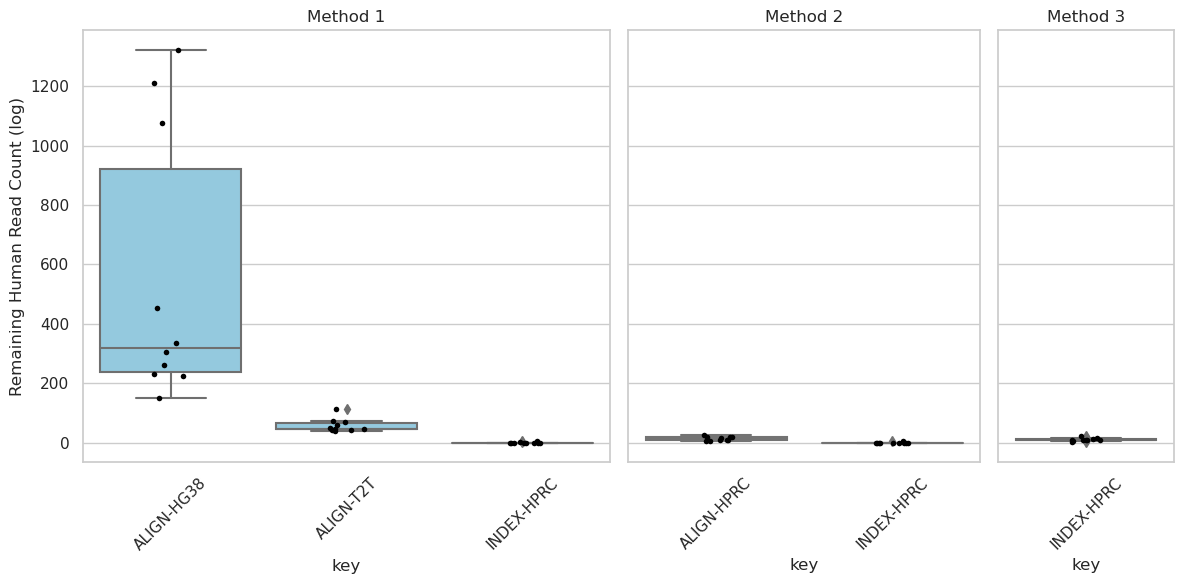

In [158]:
paths_1c = ['/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_stat_m1/align-hg38/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_stat_m1/align-t2t/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_stat_m1/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_stat_m2/align-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_stat_m2/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/mixed_simulation_tmp/final_combo/LITTLE_50.00p-HUMAN_50.00p-MICROBE/host_depleted/1M_stat_m3/index-hprc/summary_statistics.tsv']
df_list = plot_host_filtration_data(paths_1c)

## Figure 1C-2

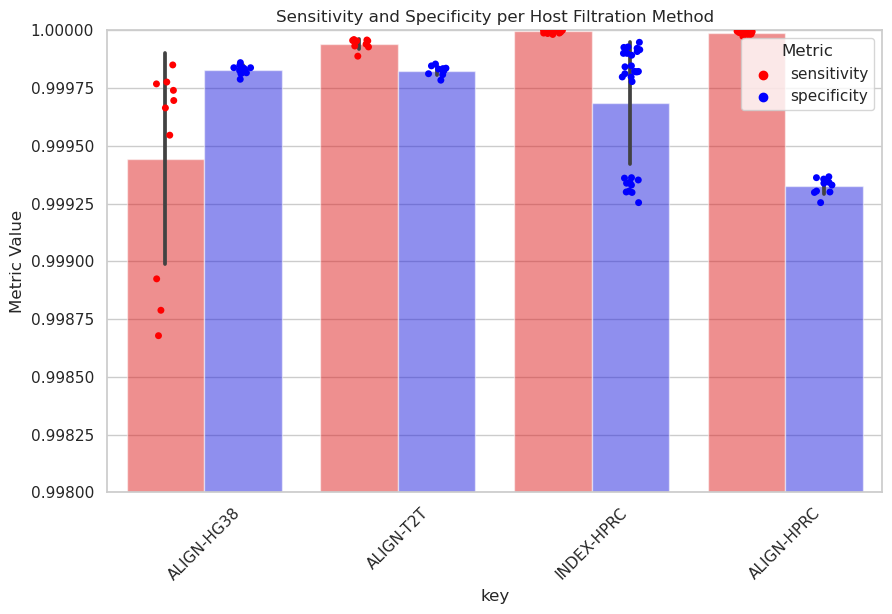

In [105]:
df_list = []
for file_path in paths_1c:
    df = pd.read_csv(file_path, sep='\t')
    method_identifier = file_path.split('/host_depleted/')[1].split('/')[0]
    df['Method Group'] = 'Method ' + method_identifier.split('_')[-1].lstrip('m')
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)
merged_df['log_human_count'] = np.log(merged_df['human count'] + 1)

# Calculate sensitivity and specificity for each row
merged_df['sensitivity'] = merged_df['TP'] / (merged_df['TP'] + merged_df['FN'])
merged_df['specificity'] = merged_df['TN'] / (merged_df['TN'] + merged_df['FP'])

# Melt the DataFrame to have 'metric' and 'value' columns for seaborn plotting
melted_df = pd.melt(merged_df, id_vars=['key'], value_vars=['sensitivity', 'specificity'],
                    var_name='metric', value_name='value')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw a categorical plot with points for each observation and bars for averages
sns.set(style="whitegrid")
ax = sns.barplot(x='key', y='value', hue='metric', data=melted_df, errorbar='sd', palette=['red', 'blue'], alpha=0.5)
sns.stripplot(x='key', y='value', hue='metric', data=melted_df, dodge=True, palette=['red', 'blue'], jitter=True, ax=ax)

# Improve the aesthetics
ax.legend_.remove()  # Remove the legend created by seaborn
ax.set_ylim(0.998, 1.0)
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels for a custom legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

l = plt.legend(handles[0:2], labels[0:2], title='Metric')  # Create a new legend without duplicate entries
plt.title('Sensitivity and Specificity per Host Filtration Method')
plt.ylabel('Metric Value')

# Show the final plot
plt.show()

## Figure 1D

In [ ]:
paths_1d = ['/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/align-hg38/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/align-t2t/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m2/align-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m2/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m3/index-hprc/summary_statistics.tsv']

df_list = plot_host_filtration_data(paths_1d)

## Figure 1E

In [ ]:
paths_1e = ['/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/align-hg38/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/align-t2t/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m2/align-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m2/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m3/index-hprc/summary_statistics.tsv']

df_list = plot_host_filtration_data(paths_1e)

## Figure 1F (this is actually figure 2A/B)

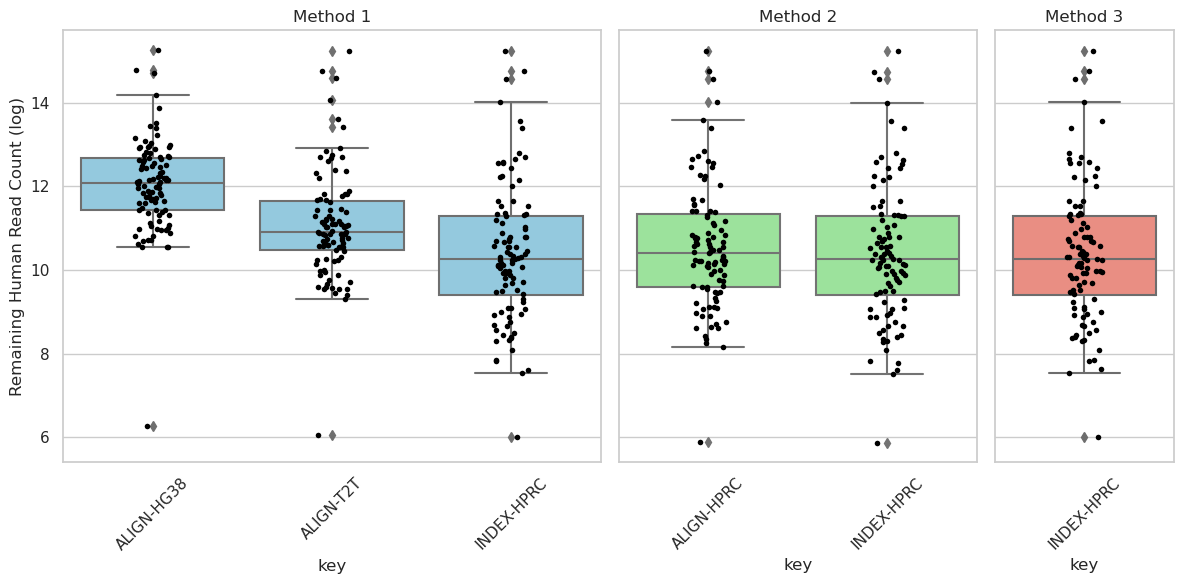

In [150]:
paths_1f = ['/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/align-hg38/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/align-t2t/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m1/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m2/align-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m2/index-hprc/summary_statistics.tsv',
              '/panfs/cguccion/23_11_07_HostDepletionBenchmarkOverflow/hmf/host_depleted/hmf_100_m3/index-hprc/summary_statistics.tsv']

df_list = plot_host_filtration_data(paths_1f)

In [140]:
df_list[0]

,file,key,line count,prefix,method group
0,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,2112,ACTN01020009T,Method 1
1,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,467368,CPCT02010336T_dedup,Method 1
2,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,1048384,CPCT02010397T_dedup,Method 1
3,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,758160,CPCT02010414T_dedup,Method 1
4,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,1261872,CPCT02010471T_dedup,Method 1
...,...,...,...,...,...
95,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,513520,CPCT02040100T_dedup,Method 1
96,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,1129872,CPCT02040102T_dedup,Method 1
97,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,227784,CPCT02040122T_dedup,Method 1
98,/panfs/cguccion/23_11_07_HostDepletionBenchmar...,ALIGN-HG38,830568,CPCT02040140T_dedup,Method 1


In [ ]:

# Read and merge all TSV files into a single DataFrame with unique method identifiers
df_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path, sep='\t')
    method_identifier = file_path.split('/host_depleted/')[1].split('/')[0]
    df['Method Group'] = method_identifier
    # Create a composite key for plotting
    df['Composite Key'] = df['key'] + ' (' + df['Method Group'] + ')'
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)

# Sort by 'Method Group' and then by 'key' within each group
merged_df.sort_values(by=['Method Group', 'key'], inplace=True)

# Reset index to align the sorted DataFrame
merged_df.reset_index(drop=True, inplace=True)

# Define specific shades for each method group
shade_colors = {
    '1M_stat_m1': ['lightblue', 'lightblue', 'lightblue'],
    '1M_stat_m2': ['lightgreen', 'lightgreen'],
    '1M_stat_m3': ['salmon'],
}

# Flatten the shade_colors dictionary to get a list of colors in the order of plotting
plot_colors = [shade for group in merged_df['Method Group'].unique() for shade in shade_colors[group]]

# Creating the box plot with unique composite keys
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='Composite Key', y='human count', data=merged_df, palette=plot_colors)
# Add points with jitter
sns.stripplot(x='Composite Key', y='human count', data=merged_df, color='black', size=4, jitter=True, ax=box_plot)

# Apply log scale to y-axis
plt.yscale('log')

# Improve the aesthetics
plt.title('Remaining Human Reads by Approach')
plt.xlabel('Method')
plt.ylabel('Log Human Read Count')

# Override the x-axis labels with 'Simple Key'
simple_keys = merged_df['key'].tolist()
#box_plot.set_xticklabels(simple_keys, rotation=45)

# Shade the background for each method group
bg_colors = {'1M_stat_m1': 'skyblue', '1M_stat_m2': 'lightgreen', '1M_stat_m3': 'salmon'}

# Create a custom legend for the method groups
patches = [Patch(color=bg_colors[group], label=group) for group in merged_df['Method Group'].unique()]
plt.legend(handles=patches, title='Method Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()